In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

Investigating the influence of the k1 parameter on the time to reach steady state in a 1 compartment model, shows that the parameter k2 is responsible for the time to reach steady
state, while the k1 parameter only regulates the scale

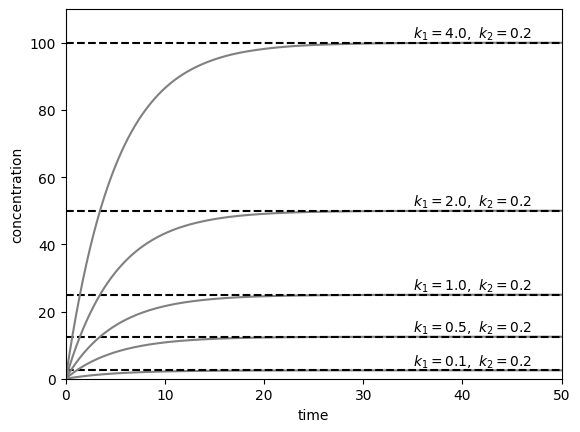

In [6]:
def ocm(t, y, c, k1, k2):
    return c * k1 - y * k2

tmax = 50
c = 5
k1 = 2.0
k2 = 0.2

fig, ax = plt.subplots(1,1)
for k1 in [0.1, 0.5, 1.0, 2.0, 4.0]:
    t = np.linspace(0,tmax,1001)
    sol = solve_ivp(ocm, t_span=(0,tmax), y0=[0], args=(c, k1, k2), t_eval=t)

    ax.plot(t, sol.y.T, color="grey")
    ax.hlines(c*k1/k2,0,tmax, ls="--", color="black")
    # ax.legend()
    ax.set_xlim(0,tmax)
    ax.set_ylim(0, c*k1/k2 * 1.1)
    ax.annotate(f"$k_1 = {k1},~k_2 = {k2}$", [35, c*k1/k2 + 1.5])
    ax.set_xlabel("time")
    ax.set_ylabel("concentration")

fig.savefig("../results/single_compartment_scale.png")

An alternative (scaled parameterization) of the equation shows that the scale is only driven by the size of $c$ and $k_2$ is the parameter that defines the dynamic of the process.

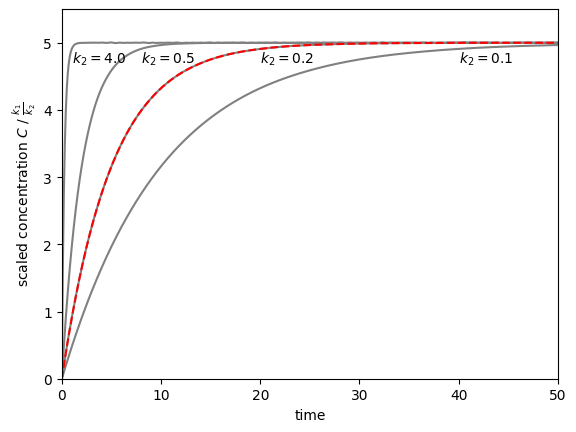

In [7]:
def ocm_scaled(t, y, c, k1, k2):
    return k2 * (c - y)

tmax = 50
c = 5
k1 = 2.0
k2 = 0.2

sol = solve_ivp(ocm, t_span=(0,tmax), y0=[0], args=(c, k1/(k1/k2), k2), t_eval=t)

fig, ax = plt.subplots(1,1)
for k2 in [0.1, 0.2, 0.5, 4.0]:
    t = np.linspace(0,tmax,1001)
    sol_scaled = solve_ivp(ocm_scaled, t_span=(0,tmax), y0=[0], args=(c, k1, k2), t_eval=t)

    ax.plot(t, sol_scaled.y.T, color="grey")
    ax.hlines(c*k1,0,tmax, ls="--", color="black")
    # ax.legend()
    ax.set_xlim(0,tmax)
    ax.set_ylim(0, c* 1.1)
    ax.annotate(f"$k_2 = {k2}$", [1/k2*c*0.8, c - 0.3])
    ax.set_xlabel("time")
    ax.set_ylabel(r"scaled concentration $C~/~\frac{k_1}{k_2}$")
ax.plot(t, sol.y.T, color="red", ls="--")
fig.savefig("../results/single_compartment_scaled_model.png")